# Capstone 1 - EDA

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import datetime
import seaborn as sns

In [263]:
# read in the data set, extract all the ticker symbols into a list
df = pd.read_csv('./data/all_cefs_clean.csv', parse_dates=['Date'], infer_datetime_format=True, index_col='ticker')
df.head()

,Date,Close,Adj_Close,NAV,Adj_NAV,Volume
ticker,,,,,,
ACP,2011-01-27,20.00,8.93,19.06,9.04,335449
ACP,2011-01-28,20.10,8.98,19.05,9.03,15700
ACP,2011-01-31,20.20,9.02,18.99,9.01,7400
ACP,2011-02-01,20.10,8.98,19.00,9.01,10150
ACP,2011-02-02,20.05,8.95,19.02,9.02,12050


In [200]:
# read in other fundamental fund data
fdf = pd.read_csv('./data/cef_fundem_clean.csv', index_col = 'Ticker')
fdf.head()

,Category,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq
Ticker,,,,,
ACP,Fixed Income,1.527958e+05,0.016755,0.023619,12.0
ACV,Equity US,2.230959e+05,0.010566,0.022416,12.0
ADX,Equity US,1.430408e+06,0.005337,0.005337,4.0
AEF,Equity Foreign,6.719044e+04,0.018305,0.020418,2.0
AFB,Municipal Bonds,3.695975e+05,0.006044,0.010214,12.0


In [264]:
df1 = df.merge(fdf, how='left', left_index=True, right_index=True)
df1.rename_axis('ticker', inplace=True)
df1.set_index(['Date'], append=True, inplace=True)

In [265]:
df1.query('Category != "Precious Metals"', inplace=True)

In [266]:
df1['Discount'] = (df1.Close - df1.NAV) / df1.NAV

In [274]:
df1.drop(index=pd.datetime(2019,3,6), level=1, inplace=True)

In [204]:
tickers = df1.index.get_level_values(0).unique()
tickers

Index(['ACP', 'ADX', 'AEF', 'AFB', 'AFT', 'AGD', 'AIF', 'AKP', 'AOD', 'APF',
       ...
       'VMO', 'VPV', 'VTA', 'VTN', 'VVR', 'WEA', 'WIA', 'WIW', 'ZF', 'ZTR'],
      dtype='object', name='ticker', length=445)

In [205]:
def annualize(pchg, period):
    return (pchg + 1)**(1/period) - 1

In [277]:
# calculate 1, 3 , 5, and 10 year rolling returns
# shift the data back so that the returns are going forward
ret_1 = []
ret_3 = []
ret_5 = []
ret_10 = []
Z1mo = []
Z3mo = []
Z6mo = []
Z1yr = []
Z2yr = []
Z3yr = []
ma200d = []
for t in tickers:
    ret_1.extend(df1.loc[t].Adj_Close.pct_change(252).shift(-252))
    ret_3.extend(df1.loc[t].Adj_Close.pct_change(252*3).apply(annualize, args=(3,)).shift(-252*3))
    ret_5.extend(df1.loc[t].Adj_Close.pct_change(252*5).apply(annualize, args=(5,)).shift(-252*5))
    ret_10.extend(df1.loc[t].Adj_Close.pct_change(252*10).apply(annualize, args=(10,)).shift(-252*10))
    Z1mo.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(21).mean()) / df1.loc[t, 'Discount'].rolling(21).std())
    Z3mo.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(21*3).mean()) / df1.loc[t, 'Discount'].rolling(21*3).std())
    Z6mo.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(21*6).mean()) / df1.loc[t, 'Discount'].rolling(21*6).std())
    Z1yr.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(252).mean()) / df1.loc[t, 'Discount'].rolling(252).std())
    Z2yr.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(252*2).mean()) / df1.loc[t, 'Discount'].rolling(252*2).std())
    Z3yr.extend((df1.loc[t, 'Discount'] - df1.loc[t, 'Discount'].rolling(252*3).mean()) / df1.loc[t, 'Discount'].rolling(252*3).std())
    ma200d.extend(df1.loc[t].Close.rolling(200).mean())
df1['ret_1'] = ret_1
df1['ret_3'] = ret_3
df1['ret_5'] = ret_5
df1['ret_10'] = ret_10
df1['Z1mo'] = Z1mo
df1['Z3mo'] = Z3mo
df1['Z6mo'] = Z6mo
df1['Z1yr'] = Z1yr
df1['Z2yr'] = Z2yr
df1['Z3yr'] = Z3yr
df1['ma200d'] = ma200d
df1.head()

Close  Adj_Close    NAV  Adj_NAV  Volume      Category  \
ticker Date                                                                 
ACP    2011-01-27  20.00       8.93  19.06     9.04  335449  Fixed Income   
       2011-01-28  20.10       8.98  19.05     9.03   15700  Fixed Income   
       2011-01-31  20.20       9.02  18.99     9.01    7400  Fixed Income   
       2011-02-01  20.10       8.98  19.00     9.01   10150  Fixed Income   
       2011-02-02  20.05       8.95  19.02     9.02   12050  Fixed Income   

                      Mkt_Cap   Act_Exp   Net_Exp  Dist_Freq   ...    \
ticker Date                                                    ...     
ACP    2011-01-27  152795.838  0.016755  0.023619       12.0   ...     
       2011-01-28  152795.838  0.016755  0.023619       12.0   ...     
       2011-01-31  152795.838  0.016755  0.023619       12.0   ...     
       2011-02-01  152795.838  0.016755  0.023619       12.0   ...     
       2011-02-02  152795.838  0.016755  0.023619       12.0   ...     

                      ret_3     ret_5  ret_10  Z1mo  Z3mo  Z6mo  Z1yr  Z2yr  \
ticker Date                                                                   
ACP    2011-01-27  0.038789 -0.039770     NaN   NaN   NaN   NaN   NaN   NaN   
       2011-01-28  0.032350 -0.038485     NaN   NaN   NaN   NaN   NaN   NaN   
       2011-01-31  0.032211 -0.040122     NaN   NaN   NaN   NaN   NaN   NaN   
       2011-02-01  0.031653 -0.041369     NaN   NaN   NaN   NaN   NaN   NaN   
       2011-02-02  0.035590 -0.040200     NaN   NaN   NaN   NaN   NaN   NaN   

                   Z3yr  ma200d  
ticker Date                      
ACP    2011-01-27   NaN     NaN  
       2011-01-28   NaN     NaN  
       2011-01-31   NaN     NaN  
       2011-02-01   NaN     NaN  
       2011-02-02   NaN     NaN  

[5 rows x 22 columns]

In [282]:
ret1vcat = []
for t in tickers:
    categ = df1.loc[t].Category[0]
    ret1vcat.extend(df1.loc[t].ret_1 - df2.loc[df1.loc[t].index[0]:].query('Category == @categ').ret_1)
df1['ret1vcat'] = ret1vcat

In [285]:
df1['from200d'] = (df1.Close - df1.ma200d) / df1.ma200d

In [286]:
df1.tail()

Close  Adj_Close    NAV  Adj_NAV  Volume   Category  \
ticker Date                                                              
ZTR    2019-02-27  10.61      10.61  10.18    10.18   56655  Equity US   
       2019-02-28  10.64      10.64  10.19    10.19   75526  Equity US   
       2019-03-01  10.67      10.67  10.18    10.18  111541  Equity US   
       2019-03-04  10.79      10.79  10.20    10.20  104747  Equity US   
       2019-03-05  10.85      10.85  10.20    10.20  142141  Equity US   

                      Mkt_Cap   Act_Exp  Net_Exp  Dist_Freq    ...     ret_10  \
ticker Date                                                    ...              
ZTR    2019-02-27  258836.393  0.010866  0.01681       12.0    ...        NaN   
       2019-02-28  258836.393  0.010866  0.01681       12.0    ...        NaN   
       2019-03-01  258836.393  0.010866  0.01681       12.0    ...        NaN   
       2019-03-04  258836.393  0.010866  0.01681       12.0    ...        NaN   
       2019-03-05  258836.393  0.010866  0.01681       12.0    ...        NaN   

                       Z1mo      Z3mo      Z6mo      Z1yr      Z2yr      Z3yr  \
ticker Date                                                                     
ZTR    2019-02-27  0.710577  1.482369  1.182492  0.999308  0.907871  1.237916   
       2019-02-28  0.793479  1.469632  1.235996  1.043652  0.949012  1.268688   
       2019-03-01  1.001071  1.499468  1.336384  1.134110  1.037406  1.335056   
       2019-03-04  1.636543  1.642654  1.559700  1.358346  1.257965  1.501527   
       2019-03-05  1.820705  1.695172  1.698916  1.486545  1.390212  1.600501   

                     ma200d  ret1vcat  from200d  
ticker Date                                      
ZTR    2019-02-27  10.69830       NaN -0.008254  
       2019-02-28  10.69635       NaN -0.005268  
       2019-03-01  10.69490       NaN -0.002328  
       2019-03-04  10.69445       NaN  0.008935  
       2019-03-05  10.69425       NaN  0.014564  

[5 rows x 24 columns]

In [281]:
df2 = df1.groupby(['Date','Category']).mean()
df2.reset_index(level=1, inplace=True)
df2

,Category,Close,Adj_Close,NAV,Adj_NAV,Volume,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq,...,ret_3,ret_5,ret_10,Z1mo,Z3mo,Z6mo,Z1yr,Z2yr,Z3yr,ma200d
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,Equity Foreign,17.998421,4.080526,28.267895,6.053684,134698.894737,216223.225405,0.014265,0.014378,2.052632,...,-0.093915,0.091818,0.097301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,Equity US,17.815667,3.940000,20.179333,4.859667,78388.700000,602138.345850,0.012212,0.013898,5.766667,...,-0.012657,0.079283,0.032704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,Fixed Income,9.994250,2.141000,11.731250,2.706500,161856.300000,347519.731045,0.009024,0.012716,10.400000,...,0.087102,0.114327,0.082731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,Municipal Bonds,11.267262,3.662619,12.288690,4.185000,34533.333333,359949.730360,0.006635,0.012561,12.000000,...,0.119598,0.103094,0.070290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,Equity Foreign,17.362105,3.984211,28.409474,6.090526,129886.684211,216223.225405,0.014265,0.014378,2.052632,...,-0.081868,0.094601,0.102044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,Equity US,17.570000,3.867333,19.657000,4.715667,85676.466667,602138.345850,0.012212,0.013898,5.766667,...,-0.005343,0.080267,0.034506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,Fixed Income,10.000250,2.141750,11.710500,2.700000,148164.825000,347519.731045,0.009024,0.012716,10.400000,...,0.088367,0.113428,0.083007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,Municipal Bonds,11.297059,3.672353,12.293059,4.185412,32368.235294,356437.463649,0.006636,0.012577,12.000000,...,0.119462,0.102830,0.070272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,Equity Foreign,17.593684,4.048421,27.169474,5.917368,96575.578947,216223.225405,0.014265,0.014378,2.052632,...,-0.080205,0.088570,0.101931,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
categ = df1.loc['ACP'].Category[0]

In [243]:
df1.loc['ACP'].ret_1 - df2.loc[df1.loc['ACP'].index[0]:].query('Category == @categ').ret_1

Date
2011-01-27   -0.167345
2011-01-28   -0.164342
2011-01-31   -0.149245
2011-02-01   -0.141881
2011-02-02   -0.146390
2011-02-03   -0.137124
2011-02-04   -0.143989
2011-02-07   -0.137344
2011-02-08   -0.116008
2011-02-09   -0.122025
2011-02-10   -0.130758
2011-02-11   -0.127441
2011-02-14   -0.119950
2011-02-15   -0.147515
2011-02-16   -0.149961
2011-02-17   -0.130493
2011-02-18   -0.122878
2011-02-22   -0.198630
2011-02-23   -0.177917
2011-02-24   -0.162077
2011-02-25   -0.142996
2011-02-28   -0.142230
2011-03-01   -0.165367
2011-03-02   -0.155714
2011-03-03   -0.160052
2011-03-04   -0.171340
2011-03-07   -0.174176
2011-03-08   -0.169932
2011-03-09   -0.160948
2011-03-10   -0.138460
                ...   
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-28         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-0

In [221]:
df1.loc['IIF'].mean()

Close            24.161580
Adj_Close        10.854664
NAV              26.125481
Adj_NAV          12.794957
Volume        96230.061309
Mkt_Cap      270319.813800
Act_Exp           0.013817
Net_Exp           0.013817
Dist_Freq         2.000000
Discount         -0.090985
ret_1             0.206947
ret_3             0.180535
ret_5             0.167340
ret_10            0.127261
Z1mo             -0.004712
Z3mo              0.023162
Z6mo              0.057246
Z1yr              0.091603
Z2yr              0.063263
Z3yr             -0.009809
ma200d           24.425604
from200d          0.024775
dtype: float64

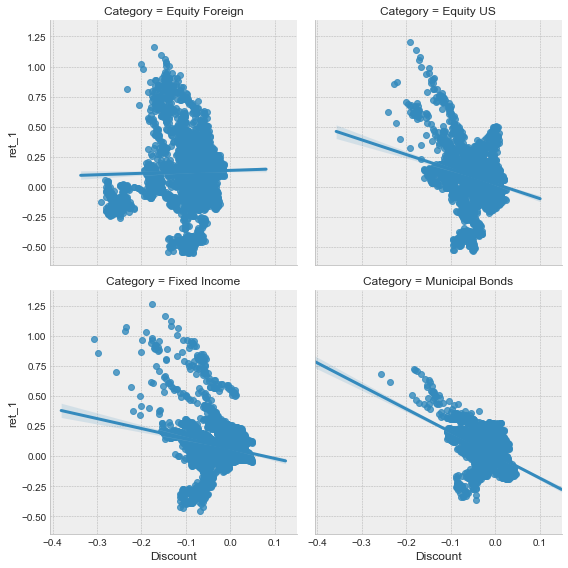

In [155]:
sns.lmplot(x='Discount', y='ret_1', col='Category', col_wrap=2, height=4, data=df2)

In [138]:
df2.corr()

,Close,Adj_Close,NAV,Adj_NAV,Volume,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq,Discount,ret_1,ret_3,ret_5,ret_10,Z1mo,Z3mo,Z6mo,Z1yr,Z2yr,Z3yr
Close,1.000000,0.044483,0.956371,0.103803,-0.086881,0.020642,0.475633,0.284592,-0.507632,0.002960,-0.230843,-0.347503,-0.380534,-0.527594,-0.008441,0.008976,0.038383,0.077709,0.121325,0.169269
Adj_Close,0.044483,1.000000,-0.021211,0.989780,0.184548,0.011361,0.061408,0.342000,0.097018,0.083121,-0.289147,-0.418408,-0.477347,-0.657516,-0.030876,-0.060348,-0.084797,-0.091326,-0.022822,0.036224
NAV,0.956371,-0.021211,1.000000,0.064988,-0.098655,-0.148766,0.568721,0.352056,-0.627006,-0.233242,-0.157227,-0.218136,-0.183146,-0.319476,-0.026956,-0.011099,0.014773,0.045975,0.078404,0.116527
Adj_NAV,0.103803,0.989780,0.064988,1.000000,0.193234,-0.051628,0.163222,0.414788,-0.009513,-0.031094,-0.276961,-0.389015,-0.423165,-0.538210,-0.050345,-0.086042,-0.115788,-0.129855,-0.075844,-0.026811
Volume,-0.086881,0.184548,-0.098655,0.193234,1.000000,0.282784,0.194249,0.462347,0.022287,-0.063257,0.074032,-0.006712,-0.027629,0.070418,-0.164449,-0.200479,-0.221427,-0.234392,-0.205470,-0.188316
Mkt_Cap,0.020642,0.011361,-0.148766,-0.051628,0.282784,1.000000,-0.211827,-0.057779,0.330015,0.313677,-0.074832,-0.200698,-0.283194,-0.442094,-0.016153,-0.038519,-0.052773,-0.070774,-0.062112,-0.047086
Act_Exp,0.475633,0.061408,0.568721,0.163222,0.194249,-0.211827,1.000000,0.805644,-0.950437,-0.479716,0.094077,0.179803,0.263304,0.299755,0.000497,0.010793,0.030948,0.053398,0.059508,0.049588
Net_Exp,0.284592,0.342000,0.352056,0.414788,0.462347,-0.057779,0.805644,1.000000,-0.612118,-0.368691,0.059838,0.104534,0.181561,0.277246,-0.016513,-0.026808,-0.027749,-0.022563,-0.004202,0.010953
Dist_Freq,-0.507632,0.097018,-0.627006,-0.009513,0.022287,0.330015,-0.950437,-0.612118,1.000000,0.516874,-0.119689,-0.249095,-0.323553,-0.350423,-0.008594,-0.031479,-0.062294,-0.096783,-0.100735,-0.085440
Discount,0.002960,0.083121,-0.233242,-0.031094,-0.063257,0.313677,-0.479716,-0.368691,0.516874,1.000000,-0.173253,-0.294994,-0.556756,-0.556323,0.151648,0.204445,0.265159,0.373443,0.526416,0.624846


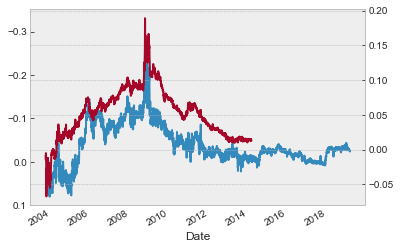

In [185]:
df1.loc['BFO'].Discount.plot()
plt.gca().invert_yaxis()
df1.loc['BFO'].ret_5.plot(secondary_y=True)


In [151]:
df1.describe()

,Close,Adj_Close,NAV,Adj_NAV,Volume,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq,Discount,ret_1,ret_3,ret_5,ret_10,Z1mo,Z3mo,Z6mo,Z1yr,Z2yr,Z3yr
count,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.699477e+06,1.587337e+06,1.363057e+06,1.138777e+06,634846.000000,1.690577e+06,1.671887e+06,1.643852e+06,1.587782e+06,1.475642e+06,1.363502e+06
mean,1.459856e+01,8.275895e+00,1.536277e+01,8.916135e+00,9.172531e+04,4.403834e+05,9.489936e-03,1.358491e-02,9.959004e+00,-4.458914e-02,8.051596e-02,6.866387e-02,6.759142e-02,0.066820,1.658261e-02,2.162421e-02,9.843997e-03,-3.742844e-03,-1.772950e-02,-7.634024e-03
std,1.052034e+01,4.647062e+00,1.267587e+01,5.016096e+00,1.503238e+05,4.909418e+05,4.139618e-03,4.910313e-03,3.740629e+00,9.835661e-02,2.037578e-01,9.589460e-02,6.830445e-02,0.037907,1.220058e+00,1.290281e+00,1.315050e+00,1.316900e+00,1.312472e+00,1.286384e+00
min,3.500000e-01,3.400000e-01,9.300000e-01,4.600000e-01,0.000000e+00,5.220000e+03,2.622799e-03,2.751231e-03,1.000000e+00,-7.235537e-01,-8.798587e-01,-5.700388e-01,-3.548665e-01,-0.231374,-4.345533e+00,-7.687869e+00,-1.035749e+01,-1.304982e+01,-1.694261e+01,-1.350783e+01
25%,1.044000e+01,5.050000e+00,1.101000e+01,5.440000e+00,1.840000e+04,1.457980e+05,6.713350e-03,1.073279e-02,1.200000e+01,-1.016414e-01,-2.150538e-02,2.227073e-02,3.342453e-02,0.049186,-8.993985e-01,-9.221999e-01,-9.475212e-01,-9.564536e-01,-9.805299e-01,-9.618328e-01
50%,1.360000e+01,7.400000e+00,1.435000e+01,7.930000e+00,4.682900e+04,2.701906e+05,8.575292e-03,1.359161e-02,1.200000e+01,-5.846280e-02,7.092199e-02,6.565062e-02,6.268543e-02,0.063801,2.366180e-02,3.481192e-02,3.217277e-02,-9.026935e-03,-2.569131e-02,-2.034592e-02
75%,1.612000e+01,1.089000e+01,1.657000e+01,1.175000e+01,1.059000e+05,5.456713e+05,1.121559e-02,1.551553e-02,1.200000e+01,-1.305483e-03,1.729958e-01,1.127205e-01,9.850891e-02,0.080505,9.462718e-01,9.837129e-01,9.865679e-01,9.792782e-01,9.501920e-01,9.167065e-01
max,3.388400e+02,6.896000e+01,5.456000e+02,6.597000e+01,2.770000e+07,3.422657e+06,4.581690e-02,7.417738e-02,1.200000e+01,1.462996e+00,3.785714e+00,9.892278e-01,6.076416e-01,0.315915,4.360106e+00,7.781663e+00,1.102346e+01,1.452185e+01,1.689491e+01,1.914461e+01


In [189]:
df1.loc[(slice(None), '2009-02-27'), ].nlargest(10,'ret_10')

,,Close,Adj_Close,NAV,Adj_NAV,Volume,Category,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq,...,ret_1,ret_3,ret_5,ret_10,Z1mo,Z3mo,Z6mo,Z1yr,Z2yr,Z3yr
ticker,Date,,,,,,,,,,,,,,,,,,,,,
RNP,2009-02-27,3.95,1.71,5.26,2.54,155342,Equity US,9.346916e+05,0.007695,0.012793,12.0,...,2.169591,0.759211,0.463233,0.277840,-1.313597,-0.042450,-0.525486,-1.231105,-1.890171,-2.367621
RQI,2009-02-27,2.42,1.07,2.79,1.35,179521,Equity US,1.337222e+06,0.009709,0.014637,12.0,...,1.925234,0.722666,0.456354,0.276592,0.327786,1.167289,0.079068,-0.668270,-0.935462,-0.975552
NRO,2009-02-27,1.24,0.56,1.45,0.71,239237,Equity US,2.271418e+05,0.009741,0.019493,12.0,...,1.964286,0.637755,0.403532,0.240440,-0.249176,0.375969,-0.197336,-0.836216,-1.249788,-0.782852
PTY,2009-02-27,7.49,2.16,6.69,1.62,658328,Fixed Income,1.354387e+06,0.005734,0.008178,12.0,...,1.560185,0.555532,0.381005,0.231073,-1.500395,-0.057629,0.368222,0.568343,0.910120,0.615549
JRS,2009-02-27,3.71,1.42,4.26,1.64,54044,Equity US,2.944095e+05,0.009444,0.015537,4.0,...,1.647887,0.631795,0.371867,0.219025,-1.211044,0.376043,0.401627,-0.277967,-0.892494,-1.217328
GGT,2009-02-27,3.03,1.20,4.11,1.71,37574,Equity US,2.017899e+05,0.011674,0.011694,4.0,...,1.200000,0.427408,0.407983,0.218804,-2.261461,-1.373187,-1.495855,-2.218171,-3.088436,-3.807832
HTD,2009-02-27,7.45,3.37,8.11,3.93,220063,Equity US,8.464092e+05,0.008186,0.014003,12.0,...,1.026706,0.466104,0.312384,0.218221,-0.200527,0.825439,1.125284,0.852705,1.132123,1.492502
DDF,2009-02-27,4.15,1.83,4.71,2.19,15934,Equity US,9.886768e+04,0.009094,0.015525,12.0,...,0.961749,0.374298,0.292856,0.214149,0.404002,0.553026,0.641850,0.024298,-0.389166,-0.700275
FFC,2009-02-27,6.55,2.70,7.01,2.83,161521,Fixed Income,8.226341e+05,0.005707,0.012608,12.0,...,1.622222,0.579523,0.359524,0.211364,-0.381318,0.517362,0.806138,0.695428,0.620430,0.659173


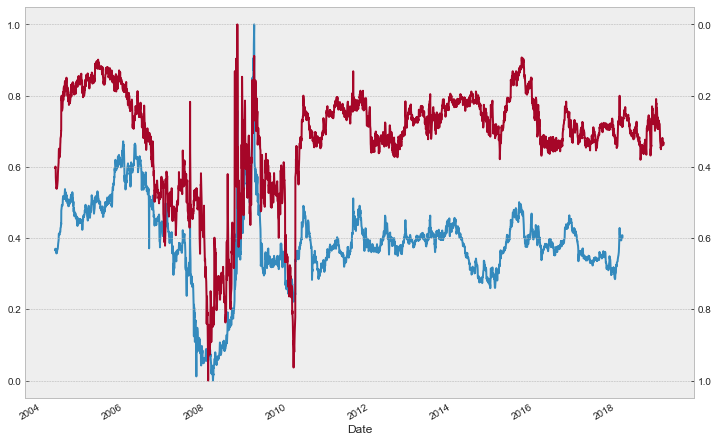

In [334]:
normret = (df1.loc['ERH'].ret_1 - df1.loc['ERH'].ret_1.min()) / (df1.loc['ERH'].ret_1.max() - df1.loc['ERH'].ret_1.min())
normret.plot()
normdisc = (df1.loc['ERH'].Discount - df1.loc['ERH'].Discount.min()) / (df1.loc['ERH'].Discount.max() - df1.loc['ERH'].Discount.min())
normdisc.plot(secondary_y=True)
plt.gca().invert_yaxis()
# df2.query('Category == "Equity Foreign"').ret_1.plot()

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [342]:
X = np.array(df1.loc['ERH'].Discount.iloc[:-252]).reshape(-1, 1)
y = df1.loc['ERH'].ret_1.iloc[:-252]
reg = LinearRegression().fit(X,y)


In [346]:
yhat = reg.predict(np.array(df1.loc['ERH'].Discount).reshape(-1,1))

In [359]:
yhat = pd.Series(yhat, index=df1.loc['ERH'].Discount.index)


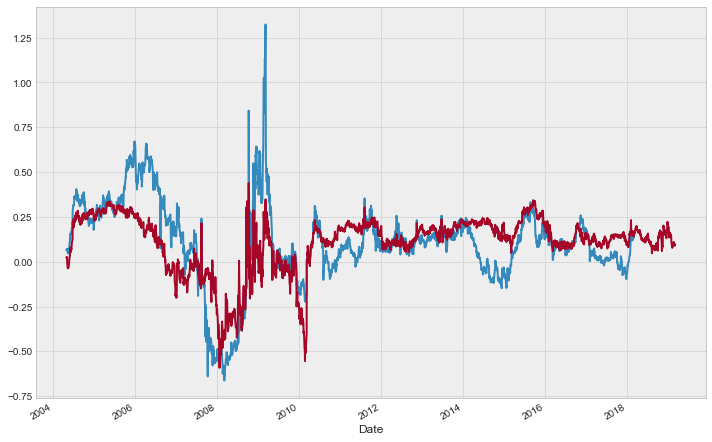

In [361]:
y.plot()
yhat.plot()

In [363]:
clf = Lasso()
clf.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [366]:
ylasso = clf.predict(np.array(df1.loc['ERH'].Discount).reshape(-1,1))
ylasso = pd.Series(ylasso, index=df1.loc['ERH'].Discount.index)

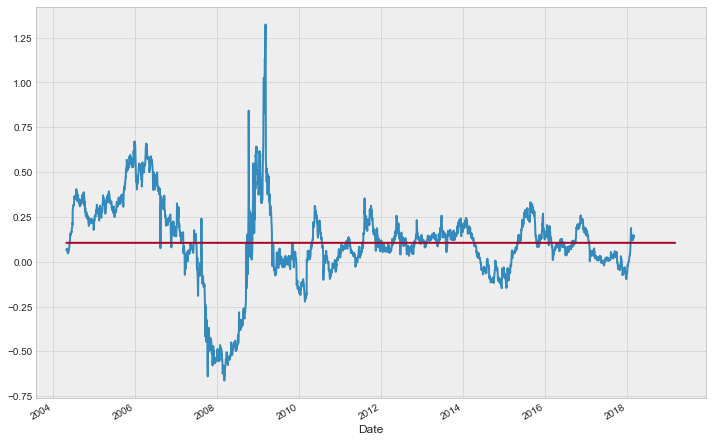

In [367]:
y.plot()
ylasso.plot()

In [322]:
df1.loc['NID'].ret_5.min()

0.016554091418272687

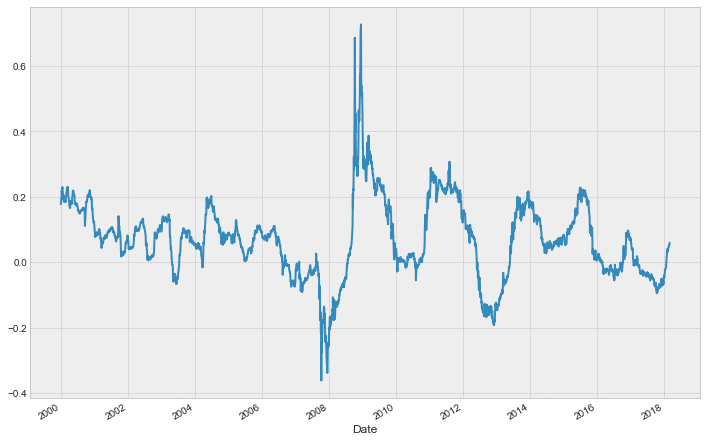

In [304]:
df2.query('Category == "Municipal Bonds"').ret_1.plot()

In [186]:
disc_corr=[]
for t in tickers:
    disc_corr.append(list(df1.loc[t].corr().loc['Discount'].iloc[-10:-6]))

corrdf = pd.DataFrame(disc_corr, index = tickers, columns = ['ret1', 'ret3', 'ret5', 'ret10'])
corrdf

,ret1,ret3,ret5,ret10
ticker,,,,
ACP,-0.399646,-0.545528,-0.625960,NaN
ADX,-0.502665,-0.318032,-0.417793,-0.461097
AEF,-0.295537,-0.568119,-0.589874,-0.728774
AFB,-0.419152,-0.519930,-0.403301,-0.552873
AFT,-0.479768,-0.800859,-0.698494,NaN
AGD,-0.279355,-0.531941,-0.263265,0.000489
AIF,-0.398822,-0.932549,-0.645761,NaN
AKP,-0.540751,-0.741525,-0.565902,-0.568140
AOD,-0.425117,-0.702978,-0.510203,-0.493297


In [323]:
corrdf.nsmallest(10, 'ret1')

,ret1,ret3,ret5,ret10
ticker,,,,
NID,-0.870679,-0.646807,-0.937441,NaN
BANX,-0.835578,-0.976332,-0.246830,NaN
NIQ,-0.823652,-0.541919,-0.958728,NaN
RGT,-0.776928,-0.630902,-0.438303,NaN
MMD,-0.755957,-0.652662,-0.735361,NaN
BTT,-0.712985,-0.300167,-0.714306,NaN
ETX,-0.698575,-0.112154,-0.838006,NaN
MTT,-0.687089,-0.749188,-0.502690,NaN
ERH,-0.685099,-0.644246,-0.560108,-0.69958


In [181]:
corrdf.nsmallest(5, 'ret3')

,ret1,ret3,ret5,ret10
ticker,,,,
BANX,-0.835578,-0.976332,-0.246830,NaN
ARDC,-0.492868,-0.968813,0.013487,NaN
BGB,-0.353916,-0.949338,-0.516526,NaN
EFF,-0.448739,-0.947568,-0.319108,NaN
AIF,-0.398822,-0.932549,-0.645761,NaN


In [182]:
corrdf.nsmallest(5, 'ret5')

,ret1,ret3,ret5,ret10
ticker,,,,
NIQ,-0.823652,-0.541919,-0.958728,NaN
NID,-0.870679,-0.646807,-0.937441,NaN
DMB,-0.678205,-0.139566,-0.928645,NaN
BFO,-0.365465,-0.561149,-0.901806,-0.587199
MCN,-0.410675,-0.793054,-0.886538,-0.894982


In [183]:
corrdf.nsmallest(5, 'ret10')

,ret1,ret3,ret5,ret10
ticker,,,,
DEX,-0.489417,-0.656300,-0.803615,-0.922793
RIF,-0.587472,-0.492344,-0.753376,-0.919175
IAF,-0.282653,-0.700695,-0.811442,-0.917128
EXG,-0.535225,-0.637158,-0.641693,-0.915715
BXMX,-0.348298,-0.612903,-0.743888,-0.904450


Text(0.5, 1.0, '1-yr return vs. discount')

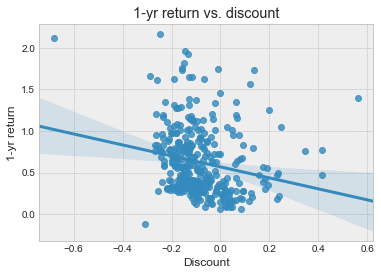

In [57]:
# sns.set_style(style='darkgrid')
mpl.style.use('bmh')
sns.regplot(x='Discount', y='ret_1', data=df1.loc[(slice(None), '2009-02-27'),])
plt.ylabel('1-yr return')
plt.title('1-yr return vs. discount')

(-0.21, 0.36)

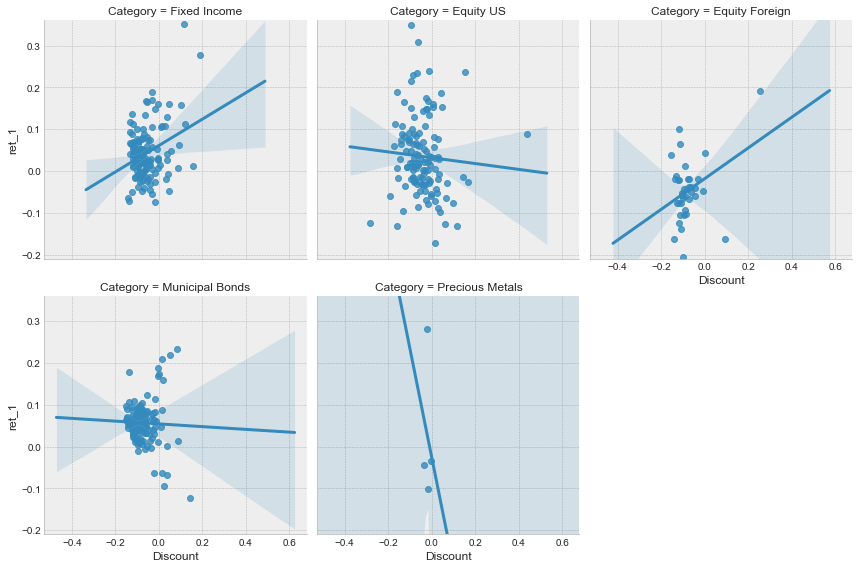

In [76]:
# sns.set_style(style='darkgrid')

sns.lmplot(x='Discount', y='ret_1', col='Category', col_wrap=3, height=4, data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylim(-.21, .36)


In [75]:
df1.loc[(slice(None), '2018-03-01'),].ret_1.max()

0.35240963855421703

Text(0.5, 1.0, '10-yr return vs. Net Expense')

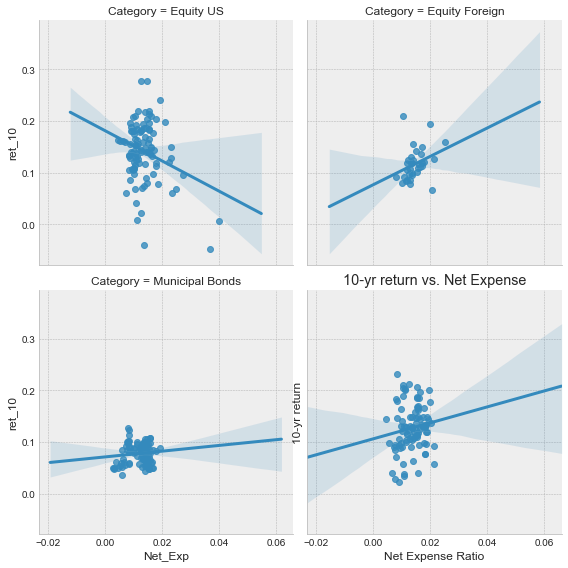

In [147]:
# sns.set_style(style='darkgrid')

sns.lmplot(x='Net_Exp', y='ret_10', col='Category', col_wrap=2, height=4, data=df1.loc[(slice(None), '2009-02-27'),])
plt.ylabel('10-yr return')
plt.xlabel('Net Expense Ratio')
plt.title('10-yr return vs. Net Expense')

Text(0.5, 1.0, '1-yr return vs. Z-score 1 mo')

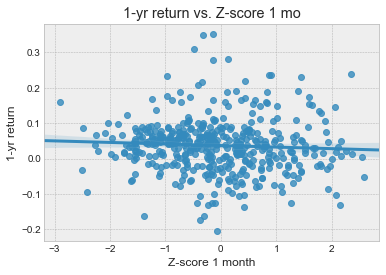

In [31]:
sns.regplot(x='Z1mo', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 1 month')
plt.title('1-yr return vs. Z-score 1 mo')

Text(0.5, 1.0, '1-yr return vs. Z-score 3 mo')

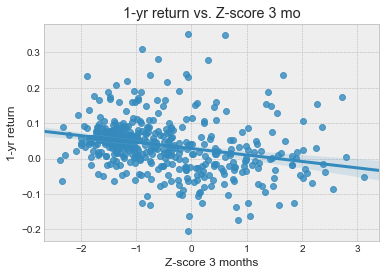

In [32]:
sns.regplot(x='Z3mo', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 3 months')
plt.title('1-yr return vs. Z-score 3 mo')

Text(0.5, 1.0, '1-yr return vs. Z-score 6 mo')

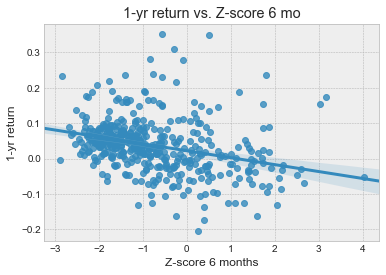

In [33]:
sns.regplot(x='Z6mo', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 6 months')
plt.title('1-yr return vs. Z-score 6 mo')

Text(0.5, 1.0, '1-yr return vs. Z-score 1 yr')

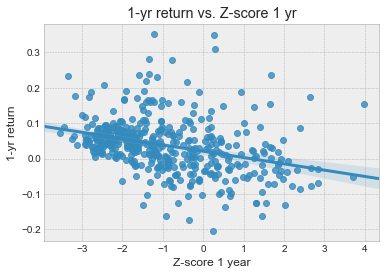

In [35]:
sns.regplot(x='Z1yr', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 1 year')
plt.title('1-yr return vs. Z-score 1 yr')

Text(0.5, 1.0, '1-yr return vs. Z-score 2 yr')

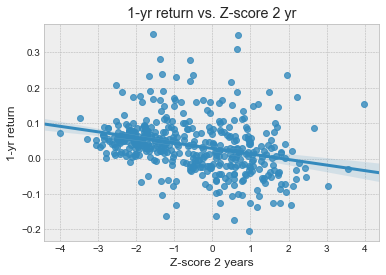

In [36]:
sns.regplot(x='Z2yr', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 2 years')
plt.title('1-yr return vs. Z-score 2 yr')

Text(0.5, 1.0, '1-yr return vs. Z-score 3 yr')

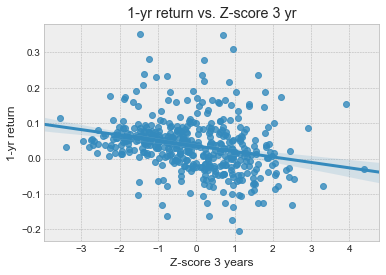

In [37]:
sns.regplot(x='Z3yr', y='ret_1', data=df1.loc[(slice(None), '2018-03-01'),])
plt.ylabel('1-yr return')
plt.xlabel('Z-score 3 years')
plt.title('1-yr return vs. Z-score 3 yr')

In [50]:
df1.loc[(slice(None), '2011-03-01'),].corr()

,Close,Adj_Close,NAV,Adj_NAV,Volume,Mkt_Cap,Act_Exp,Net_Exp,Dist_Freq,Discount,ret_1,ret_3,ret_5,ret_10,Z1mo,Z3mo,Z6mo,Z1yr,Z2yr,Z3yr
Close,1.000000,0.843487,0.957455,0.782186,-0.090827,0.005942,0.201422,0.119912,-0.198471,0.204438,-0.274331,-0.163141,-0.310790,NaN,-0.010646,-0.071959,-0.011450,0.071064,0.039851,0.021619
Adj_Close,0.843487,1.000000,0.856720,0.955247,-0.033870,0.019974,0.067682,0.026811,-0.178248,0.042740,-0.118507,-0.287580,-0.277303,NaN,-0.093418,-0.136865,-0.051202,0.037120,0.021359,-0.008152
NAV,0.957455,0.856720,1.000000,0.873329,-0.106345,0.006593,0.208879,0.111524,-0.271780,-0.057473,-0.265971,-0.120219,-0.267001,NaN,-0.090897,-0.165950,-0.081583,0.036979,0.026578,-0.018240
Adj_NAV,0.782186,0.955247,0.873329,1.000000,-0.065511,0.015141,0.088511,0.018572,-0.262218,-0.214694,-0.146521,-0.241591,-0.240672,NaN,-0.164422,-0.218411,-0.123377,0.001693,0.008503,-0.048925
Volume,-0.090827,-0.033870,-0.106345,-0.065511,1.000000,0.547227,-0.086046,-0.180238,0.100610,0.050722,-0.225670,-0.150624,-0.244309,NaN,0.154863,0.118112,0.113581,0.051571,-0.048104,-0.046543
Mkt_Cap,0.005942,0.019974,0.006593,0.015141,0.547227,1.000000,-0.171047,-0.187097,0.098563,-0.001617,-0.002383,0.108111,0.058448,NaN,0.042673,0.059247,0.059657,0.026813,-0.034061,-0.053771
Act_Exp,0.201422,0.067682,0.208879,0.088511,-0.086046,-0.171047,1.000000,0.680072,-0.425648,-0.114910,-0.463652,-0.028253,-0.381803,NaN,-0.005196,-0.059410,0.035963,0.083884,0.091988,0.064383
Net_Exp,0.119912,0.026811,0.111524,0.018572,-0.180238,-0.187097,0.680072,1.000000,-0.058227,-0.046209,-0.103992,0.004563,-0.190369,NaN,-0.049717,-0.046779,0.010207,0.015211,0.148391,0.189237
Dist_Freq,-0.198471,-0.178248,-0.271780,-0.262218,0.100610,0.098563,-0.425648,-0.058227,1.000000,0.246887,0.426171,-0.039829,0.233221,NaN,-0.052917,-0.009337,-0.128654,-0.272331,-0.210639,-0.096909
Discount,0.204438,0.042740,-0.057473,-0.214694,0.050722,-0.001617,-0.114910,-0.046209,0.246887,1.000000,-0.030159,-0.187907,-0.141293,NaN,0.316376,0.374872,0.314504,0.215749,0.135255,0.224667


C:\Users\robin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\robin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  52.,  242., 1234., 1221.,  980.,  227.,   70.,   33.,   10.,
           4.]),
 array([-3.68305082, -2.63457423, -1.58609763, -0.53762104,  0.51085555,
         1.55933215,  2.60780874,  3.65628534,  4.70476193,  5.75323852,
         6.80171512]),
 <a list of 10 Patch objects>)

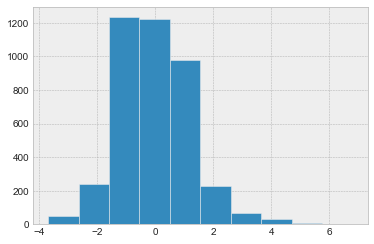

In [48]:
plt.hist(df1.loc['IIF', 'Z3yr'])

In [197]:
import statsmodels.api as sm
from pylab import rcParams

In [216]:
df3 = df1.loc['IIF'].Adj_Close
df3.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25',
               '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
               '2019-03-04', '2019-03-05'],
              dtype='datetime64[ns]', name='Date', length=4828, freq=None)

In [301]:
df2.query('Category == "Municipal Bonds"').ret_1.iloc[:-252]

Date
2000-01-03    0.177690
2000-01-04    0.183810
2000-01-05    0.185786
2000-01-06    0.186723
2000-01-07    0.196460
2000-01-10    0.200645
2000-01-11    0.212986
2000-01-12    0.218288
2000-01-13    0.213976
2000-01-14    0.222030
2000-01-18    0.229174
2000-01-19    0.226673
2000-01-20    0.228497
2000-01-21    0.221188
2000-01-24    0.217359
2000-01-25    0.206425
2000-01-26    0.201828
2000-01-27    0.194036
2000-01-28    0.196858
2000-01-31    0.200276
2000-02-01    0.205237
2000-02-02    0.198640
2000-02-03    0.186739
2000-02-04    0.184865
2000-02-07    0.186408
2000-02-08    0.186270
2000-02-09    0.188370
2000-02-10    0.189899
2000-02-11    0.191342
2000-02-14    0.194894
                ...   
2018-01-22   -0.014399
2018-01-23   -0.010523
2018-01-24   -0.008557
2018-01-25   -0.005447
2018-01-26    0.000462
2018-01-29    0.014833
2018-01-30    0.023427
2018-01-31    0.024466
2018-02-01    0.026158
2018-02-02    0.033080
2018-02-05    0.040354
2018-02-06    0.035379
2018-0

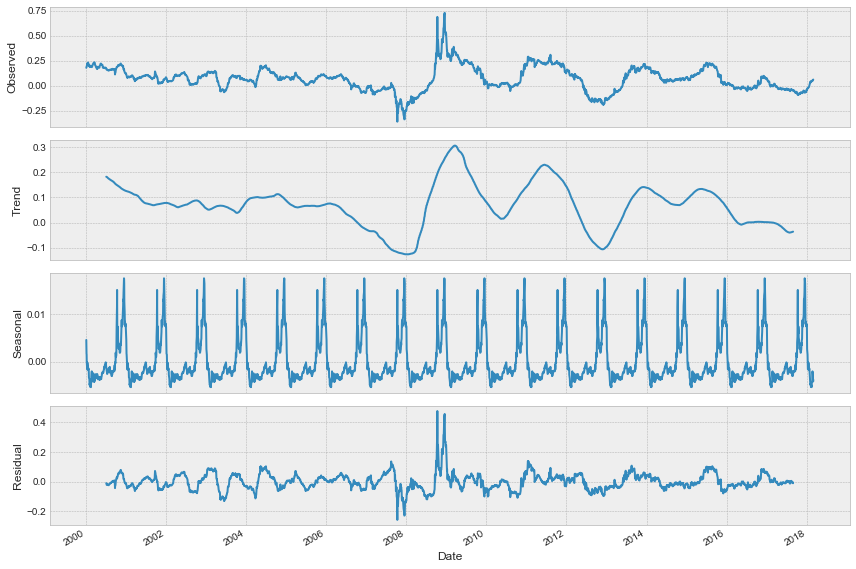

In [302]:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df2.query('Category == "Municipal Bonds"').ret_1.iloc[:-252], model='additive', freq=252)
fig = decomposition.plot()
plt.show()

In [ ]:
df1.head()